circle_separator.txt
************
avg empirical_error p = 1:  [0.         0.03226667 0.05133333 0.06933333 0.08386667]
avg true errors p = 1:  [0.0708     0.08693333 0.10453333 0.1244     0.14573333]
avg empirical_error p = 2:  [0.         0.0284     0.05026667 0.0676     0.08426667]
avg true errors p = 2:  [0.0668     0.08293333 0.09613333 0.11773333 0.142     ]
avg empirical_error p = infiniti:  [0.         0.03133333 0.04773333 0.06746667 0.0924    ]
avg true errors p = infiniti:  [0.07613333 0.08786667 0.10226667 0.11986667 0.14973333]
*************
 difference
diff p = 1:  [0.0708     0.05466667 0.0532     0.05506667 0.06186667]
diff p = 2:  [0.0668     0.05453333 0.04586667 0.05013333 0.05773333]
diff p = infiniti:  [0.07613333 0.05653333 0.05453333 0.0524     0.05733333]


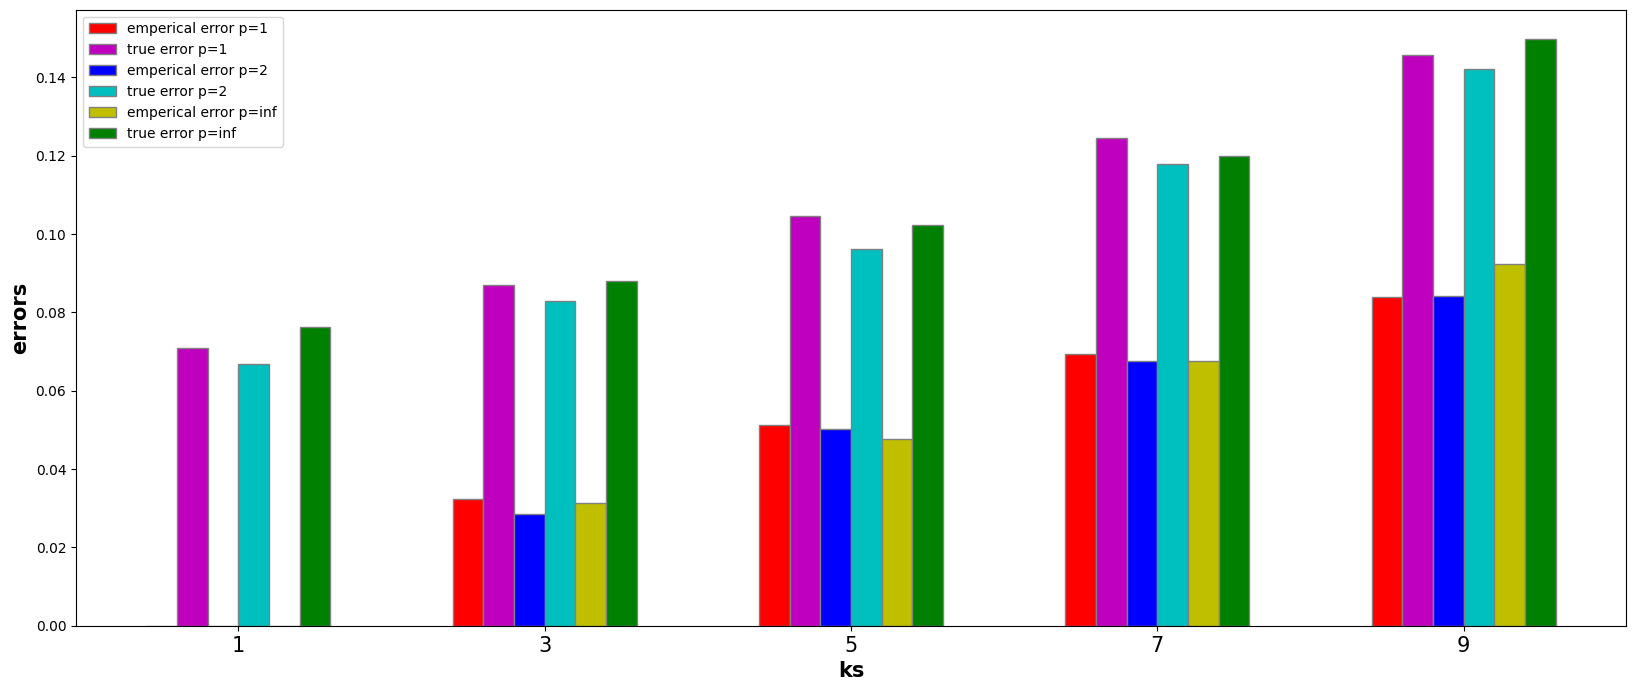

In [5]:
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Function to load the data and preprocess it
def load_and_preprocess_data(file_path):
    print(file_path)
    # Assuming the data is in a CSV format and the last column is the label
    data = pd.read_csv(file_path, sep=" ", header=None)
    # Last column is the label, the rest are features
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    return X, y


def color_list(l):
    color_list=[]
    for i in l:
        if i>0:
            color_list.append("red")
        elif i<0:
            color_list.append("blue")
        else:
            color_list.append("green")
    return color_list


def show_graphs(Train_x, Test_x,
                Train_y, Test_y,
                pred_tr1,pred_tr2,pred_tr_inf,
                pred_te1,pred_te2,pred_te_inf,
                k):

    fig, axs = plt.subplots(2,3)
    fig.set_figheight(10)
    fig.set_figwidth(15)
   
    xx1 = []
    yy1 = []
    size1 = []
    size2 = []
    for j in Train_x:
        xx1.append(j[0])
        yy1.append(j[1])
        size1.append(60)
        size2.append(30)

    axs[0,0].scatter(xx1, yy1, c=color_list(pred_tr1),s=size1)
    axs[0,0].scatter(xx1, yy1, c=color_list(Train_y),s=size2)
    t = "knn train with "
    t += str(k)
    t += " kneighbors p = 1"
    axs[0,0].set_title(t)

    axs[0,1].scatter(xx1, yy1, c=color_list(pred_tr2),s=size1)
    axs[0,1].scatter(xx1, yy1, c=color_list(Train_y),s=size2)
    t = "knn train with "
    t += str(k)
    t += " kneighbors p = 2"
    axs[0,1].set_title(t)

    axs[0,2].scatter(xx1, yy1, c=color_list(pred_tr_inf),s=size1)
    axs[0,2].scatter(xx1, yy1, c=color_list(Train_y),s=size2)
    t = "knn train with "
    t += str(k)
    t += " kneighbors p = inf"
    axs[0,2].set_title(t)


    xx1 = []
    yy1 = []
    size1 = []
    size2 = []
    for j in Test_x:
        xx1.append(j[0])
        yy1.append(j[1])
        size1.append(60)
        size2.append(30)

    axs[1,0].scatter(xx1, yy1, c=color_list(pred_te1),s=size1)
    axs[1,0].scatter(xx1, yy1, c=color_list(Test_y),s=size2)
    t = "knn test with "
    t += str(k)
    t += " kneighbors p = 1"
    axs[1,0].set_title(t)

    axs[1,1].scatter(xx1, yy1, c=color_list(pred_te2),s=size1)
    axs[1,1].scatter(xx1, yy1, c=color_list(Test_y),s=size2)
    t = "knn test with "
    t += str(k)
    t += " kneighbors p = 2"
    axs[1,1].set_title(t)

    axs[1,2].scatter(xx1, yy1, c=color_list(pred_te_inf),s=size1)
    axs[1,2].scatter(xx1, yy1, c=color_list(Test_y),s=size2)
    t = "knn test with "
    t += str(k)
    t += " kneighbors p = inf"
    axs[1,2].set_title(t)

    plt.show()


def Predict_train(points,Train_y,k):
    pred1=[]
    pred2=[]
    pred_inf=[]
    for i in points:
        x1,y1 =i
        dist1=[]
        dist2=[]
        dist_inf=[]
        for j in range(len(points)):
            x2 ,y2 = points[j]
            dist1.append([np.abs(x1-x2)+np.abs(y1-y2),Train_y[j]])
            dist2.append([np.sqrt((x1-x2)**2+(y1-y2)**2),Train_y[j]])
            opt1=np.abs(x1-x2)
            opt2=np.abs(y1-y2)
            if opt1>opt2:
                dist_inf.append([opt1,Train_y[j]])
            else:
                dist_inf.append([opt2,Train_y[j]])  
        dist1.sort(key=lambda x:x[0])
        dist1=dist1[:k]
        c1 = 0
        for j in dist1:
            c1+=j[1]
        c1 = np.sign(c1)
        pred1.append(c1)

        dist2.sort(key=lambda x:x[0])
        dist2=dist2[:k]
        c1 = 0
        for j in dist2:
            c1+=j[1]
        c1 = np.sign(c1)
        pred2.append(c1)
        dist_inf.sort(key=lambda x:x[0])
        dist_inf=dist_inf[:k]
        c1 = 0
        for j in dist_inf:
            c1+=j[1]
        c1 = np.sign(c1)
        pred_inf.append(c1)
   
    return pred1, pred2, pred_inf


def Predict_test(train_x,test_x,Train_y,k):
    pred1=[]
    pred2=[]
    pred_inf=[]
    for i in test_x:
        x1,y1 =i
        dist1=[]
        dist2=[]
        dist_inf=[]
        for j in range(len(train_x)):
            x2 ,y2 = train_x[j]
            dist1.append([np.abs(x1-x2)+np.abs(y1-y2),Train_y[j]])
            dist2.append([np.sqrt((x1-x2)**2+(y1-y2)**2),Train_y[j]])
            opt1=np.abs(x1-x2)
            opt2=np.abs(y1-y2)
            if opt1>opt2:
                dist_inf.append([opt1,Train_y[j]])
            else:
                dist_inf.append([opt2,Train_y[j]])  
        dist1.sort(key=lambda x:x[0])
        dist1=dist1[:k]
        c1 = 0
        for j in dist1:
            c1+=j[1]
        c1 = np.sign(c1)
        pred1.append(c1)

        dist2.sort(key=lambda x:x[0])
        dist2=dist2[:k]
        c1 = 0
        for j in dist2:
            c1+=j[1]
        c1 = np.sign(c1)
        pred2.append(c1)
        dist_inf.sort(key=lambda x:x[0])
        dist_inf=dist_inf[:k]
        c1 = 0
        for j in dist_inf:
            c1+=j[1]
        c1 = np.sign(c1)
        pred_inf.append(c1)
   
    return pred1, pred2, pred_inf


def barplot(l1,l2,l3,l4,l5,l6):
    # set width of bar 
    barWidth = 0.1
    fig = plt.subplots(figsize =(20, 8))    

    br1 = np.arange(len(l1)) 
    br2 = [x + barWidth for x in br1] 
    br3 = [x + barWidth for x in br2] 
    br4 = [x + barWidth for x in br3] 
    br5 = [x + barWidth for x in br4] 
    br6 = [x + barWidth for x in br5] 
    
    # Make the plot
    plt.bar(br1, l1, color ='r', width = barWidth, edgecolor ='grey', label ='emperical error p=1') 
    plt.bar(br2, l2, color ='m', width = barWidth, edgecolor ='grey', label ='true error p=1') 
    plt.bar(br3, l3, color ='b', width = barWidth, edgecolor ='grey', label ='emperical error p=2') 
    plt.bar(br4, l4, color ='c', width = barWidth, edgecolor ='grey', label ='true error p=2')
    plt.bar(br5, l5, color ='y', width = barWidth, edgecolor ='grey', label ='emperical error p=inf')
    plt.bar(br6, l6, color ='g', width = barWidth, edgecolor ='grey', label ='true error p=inf')

    # Adding Xticks 
    plt.xlabel('ks', fontweight ='bold', fontsize = 15) 
    plt.ylabel('errors', fontweight ='bold', fontsize = 15) 
    plt.xticks([r + 2.5*barWidth for r in range(len(l1))], ['1', '3', '5', '7', '9'],fontsize=15)
    
    plt.legend()
    plt.show() 





def knn(num_runs=100):
    X,y = load_and_preprocess_data('circle_separator.txt')
    avg_empirical_errors1 = np.zeros(5)
    avg_true_errors1 = np.zeros(5)
    avg_empirical_errors2 = np.zeros(5)
    avg_true_errors2 = np.zeros(5)
    avg_empirical_errors_inf = np.zeros(5)
    avg_true_errors_inf = np.zeros(5)
    avg = np.ones(5) * num_runs
    for i in range(num_runs):
        Train_x, Test_x,Train_y, Test_y = train_test_split(X, y, test_size=0.5, random_state=i)
        ks = [1,3,5,7,9]
        emp1 =[]
        true1=[]
        emp2 =[]
        true2=[]
        emp_inf =[]
        true_inf=[]
        for k in ks:
            pred_tr1, pred_tr2, pred_tr_inf = Predict_train(Train_x,Train_y,k)

            # print("p=1 k=" ,k,"\n", confusion_matrix(Train_y, pred_tr1))
            # print("p=2 k=" ,k,"\n", confusion_matrix(Train_y, pred_tr2))
            # print("p=inf k=" ,k,"\n", confusion_matrix(Train_y, pred_tr_inf))

            pred_te1, pred_te2, pred_te_inf = Predict_test(Train_x,Test_x,Train_y,k)

            # print("p=1 k=" ,k,"\n", confusion_matrix(Test_y, pred_te1))
            # print("p=2 k=" ,k,"\n", confusion_matrix(Test_y, pred_te2))
            # print("p=inf k=" ,k,"\n", confusion_matrix(Test_y, pred_te_inf))
            
            error_train1 = np.sum([pred_tr1 != Train_y])/len(Train_y)
            error_test1 = np.sum([pred_te1 != Test_y])/len(Test_y)

            error_train2 = np.sum([pred_tr2 != Train_y])/len(Train_y)
            error_test2 = np.sum([pred_te2 != Test_y])/len(Test_y)

            error_train_inf = np.sum([pred_tr_inf != Train_y])/len(Train_y)
            error_test_inf = np.sum([pred_te_inf != Test_y])/len(Test_y)

            emp1.append(error_train1)
            true1.append(error_test1)
            emp2.append(error_train2)
            true2.append(error_test2)
            emp_inf.append(error_train_inf)
            true_inf.append(error_test_inf)
            
            # show_graphs(Train_x, Test_x,
            #     Train_y, Test_y,
            #     pred_tr1,pred_tr2,pred_tr_inf,
            #     pred_te1,pred_te2,pred_te_inf,
            #     k)
        avg_empirical_errors1+=emp1
        avg_true_errors1+=true1
        avg_empirical_errors2+=emp2
        avg_true_errors2+=true2
        avg_empirical_errors_inf+=emp_inf
        avg_true_errors_inf+=true_inf
   
     
    print("************")
    print("avg empirical_error p = 1: ",avg_empirical_errors1/avg)
    print("avg true errors p = 1: ",avg_true_errors1/avg)
    print("avg empirical_error p = 2: ",avg_empirical_errors2/avg)
    print("avg true errors p = 2: ",avg_true_errors2/avg)
    print("avg empirical_error p = infiniti: ",avg_empirical_errors_inf/avg)
    print("avg true errors p = infiniti: ",avg_true_errors_inf/avg)

    print("*************\n difference")
    print("diff p = 1: ",avg_true_errors1/avg - avg_empirical_errors1/avg)
    print("diff p = 2: ",avg_true_errors2/avg - avg_empirical_errors2/avg)
    print("diff p = infiniti: ",avg_true_errors_inf/avg - avg_empirical_errors_inf/avg)
    


    barplot(avg_empirical_errors1/avg,
            avg_true_errors1/avg,
            avg_empirical_errors2/avg,
            avg_true_errors2/avg,
            avg_empirical_errors_inf/avg,
            avg_true_errors_inf/avg)
    
   


def main():
    knn(100)


if __name__ == '__main__':
    main()

haberman+s+survival/haberman.data
************
avg empirical_error p = 1:  [0.01052288 0.17117647 0.20228758 0.22117647 0.22797386]
avg true errors p = 1:  [0.33235294 0.29189542 0.27196078 0.2624183  0.25627451]
avg empirical_error p = 2:  [0.01052288 0.16444444 0.20627451 0.21888889 0.22686275]
avg true errors p = 2:  [0.31980392 0.29215686 0.27392157 0.25738562 0.25738562]
avg empirical_error p = infiniti:  [0.01052288 0.16607843 0.20130719 0.21555556 0.22261438]
avg true errors p = infiniti:  [0.32797386 0.28901961 0.27372549 0.26117647 0.25333333]
*************
 difference
diff p = 1:  [0.32183007 0.12071895 0.0696732  0.04124183 0.02830065]
diff p = 2:  [0.30928105 0.12771242 0.06764706 0.03849673 0.03052288]
diff p = infiniti:  [0.31745098 0.12294118 0.0724183  0.04562092 0.03071895]


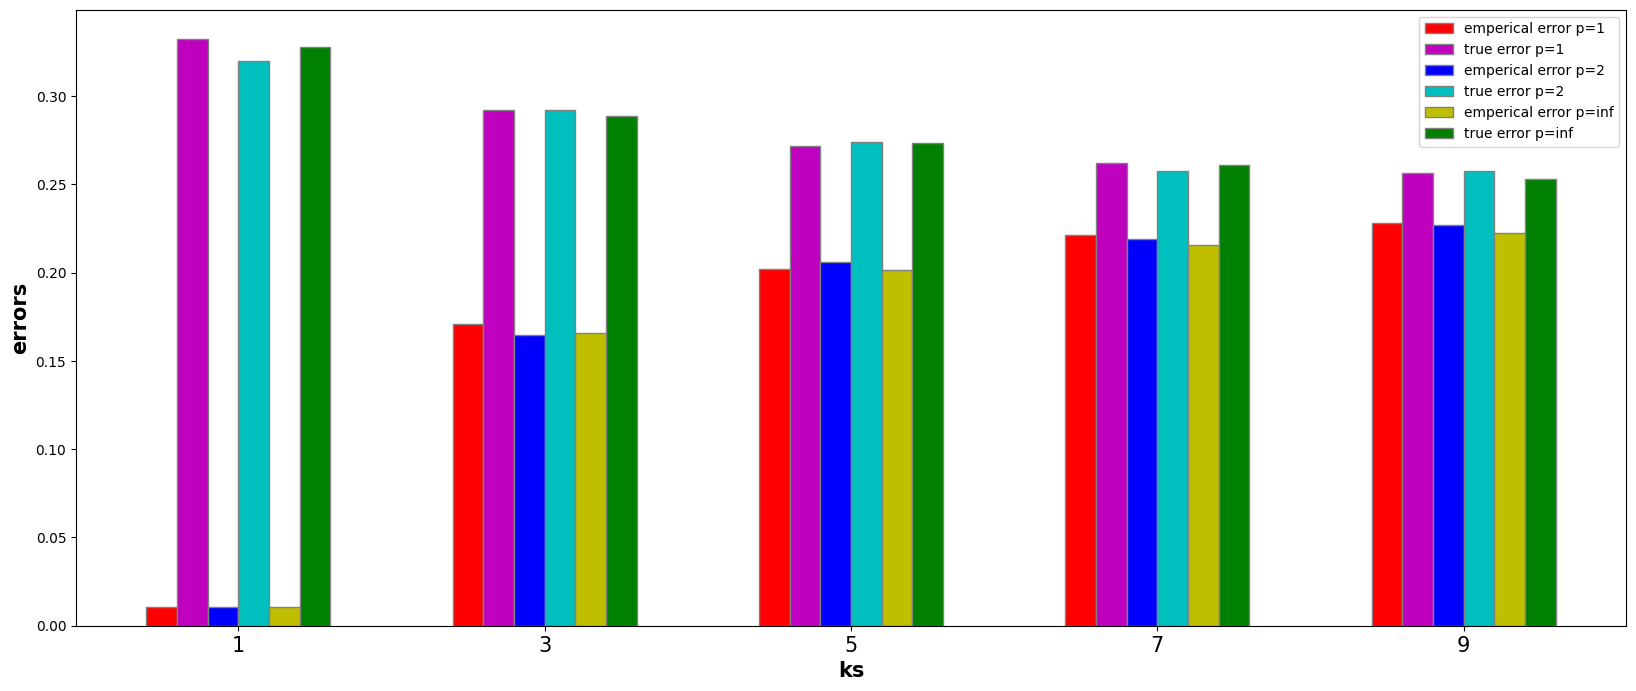

In [2]:

import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to load the data and preprocess it
def load_and_preprocess_data(file_path):
    print(file_path)
    x1 = []
    x2 = []
    x3 = [] 
    x4 = []
    f = open(file_path, "r")
    lines = f.readlines()
    for i in lines:
        l = i.split(',')
        x1.append(int(l[0]))
        x2.append(int(l[1]))
        x3.append(int(l[2]))
        if l[3][0]==('1'):
            x4.append(1)
        else:
            x4.append(-1)
    dict = {'age': x1, 'year': x2, 'num': x3,'class': x4 } 
    data = pd.DataFrame(dict)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
     
    return X, y


def color_list(l):
    color_list=[]
    for i in l:
        if i>0:
            color_list.append("red")
        elif i<0:
            color_list.append("blue")
        else:
            color_list.append("green")
    return color_list


def show_graphs(Train_x, Test_x,
                Train_y, Test_y,
                pred_tr1,pred_tr2,pred_tr_inf,
                pred_te1,pred_te2,pred_te_inf,
                k):
    fig = plt.figure() 
    
    fig.set_figheight(15)
    fig.set_figwidth(20)
   
    xx1 = []
    yy1 = []
    zz1 =[]
    size1 = []
    size2 = []
    for j in Train_x:
        xx1.append(j[0])
        yy1.append(j[1])
        zz1.append(j[2])
        size1.append(60)
        size2.append(30)

    axs = fig.add_subplot(2,3,1, projection='3d')
    axs.scatter(xx1, yy1,zz1, c=color_list(pred_tr1),s=size1)
    axs.scatter(xx1, yy1,zz1, c=color_list(Train_y),s=size2)
    t = "knn train with "
    t += str(k)
    t += " kneighbors p = 1"
    axs.set_title(t)

    axs = fig.add_subplot(2,3,2, projection='3d')
    axs.scatter(xx1, yy1,zz1, c=color_list(pred_tr2),s=size1)
    axs.scatter(xx1, yy1,zz1, c=color_list(Train_y),s=size2)
    t = "knn train with "
    t += str(k)
    t += " kneighbors p = 2"
    axs.set_title(t)

    axs = fig.add_subplot(2,3,3, projection='3d')
    axs.scatter(xx1, yy1,zz1, c=color_list(pred_tr_inf),s=size1)
    axs.scatter(xx1, yy1,zz1, c=color_list(Train_y),s=size2)
    t = "knn train with "
    t += str(k)
    t += " kneighbors p = inf"
    axs.set_title(t)


    xx1 = []
    yy1 = []
    zz1 = []
    size1 = []
    size2 = []
    for j in Test_x:
        xx1.append(j[0])
        yy1.append(j[1])
        zz1.append(j[2])
        size1.append(60)
        size2.append(30)


    axs = fig.add_subplot(2,3,4, projection='3d')
    axs.scatter(xx1, yy1,zz1, c=color_list(pred_te1),s=size1)
    axs.scatter(xx1, yy1,zz1, c=color_list(Test_y),s=size2)
    t = "knn test with "
    t += str(k)
    t += " kneighbors p = 1"
    axs.set_title(t)

    axs = fig.add_subplot(2,3,5, projection='3d')
    axs.scatter(xx1, yy1,zz1, c=color_list(pred_te2),s=size1)
    axs.scatter(xx1, yy1,zz1, c=color_list(Test_y),s=size2)
    t = "knn test with "
    t += str(k)
    t += " kneighbors p = 2"
    axs.set_title(t)

    axs = fig.add_subplot(2,3,6, projection='3d')
    axs.scatter(xx1, yy1,zz1, c=color_list(pred_te_inf),s=size1)
    axs.scatter(xx1, yy1,zz1, c=color_list(Test_y),s=size2)
    t = "knn test with "
    t += str(k)
    t += " kneighbors p = inf"
    axs.set_title(t)

    plt.show()


def Predict_train(points,Train_y,k):
    pred1=[]
    pred2=[]
    pred_inf=[]
    for i in points:
        x1,y1,z1 =i
        dist1=[]
        dist2=[]
        dist_inf=[]
        for j in range(len(points)):
            x2 ,y2,z2 = points[j]
            dist1.append([np.abs(x1-x2)+np.abs(y1-y2)+np.abs(z1-z2),Train_y[j]])
            dist2.append([np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2),Train_y[j]])
            opt1=np.abs(x1-x2)
            opt2=np.abs(y1-y2)
            opt3=np.abs(z1-z2)
            if opt1 >= opt2 and opt1 >= opt3:
                dist_inf.append([opt1,Train_y[j]])
            elif opt2 >= opt1 and opt2 >= opt3:
                dist_inf.append([opt2,Train_y[j]]) 
            else:
                dist_inf.append([opt3,Train_y[j]])
        dist1.sort(key=lambda x:x[0])
        dist1=dist1[:k]
        c1 = 0
        for j in dist1:
            c1+=j[1]
        c1 = np.sign(c1)
        pred1.append(c1)

        dist2.sort(key=lambda x:x[0])
        dist2=dist2[:k]
        c1 = 0
        for j in dist2:
            c1+=j[1]
        c1 = np.sign(c1)
        pred2.append(c1)
        dist_inf.sort(key=lambda x:x[0])
        dist_inf=dist_inf[:k]
        c1 = 0
        for j in dist_inf:
            c1+=j[1]
        c1 = np.sign(c1)
        pred_inf.append(c1)
   
    return pred1, pred2, pred_inf


def Predict_test(train_x,test_x,Train_y,k):
    pred1=[]
    pred2=[]
    pred_inf=[]
    for i in test_x:
        x1,y1,z1 =i
        dist1=[]
        dist2=[]
        dist_inf=[]
        for j in range(len(train_x)):
            x2 ,y2,z2 = train_x[j]
            dist1.append([np.abs(x1-x2)+np.abs(y1-y2)+np.abs(z1-z2),Train_y[j]])
            dist2.append([np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2),Train_y[j]])
            opt1=np.abs(x1-x2)
            opt2=np.abs(y1-y2)
            opt3=np.abs(z1-z2)
            if opt1 >= opt2 and opt1 >= opt3:
                dist_inf.append([opt1,Train_y[j]])
            elif opt2 >= opt1 and opt2 >= opt3:
                dist_inf.append([opt2,Train_y[j]]) 
            else:
                dist_inf.append([opt3,Train_y[j]]) 
        dist1.sort(key=lambda x:x[0])
        dist1=dist1[:k]
        c1 = 0
        for j in dist1:
            c1+=j[1]
        c1 = np.sign(c1)
        pred1.append(c1)

        dist2.sort(key=lambda x:x[0])
        dist2=dist2[:k]
        c1 = 0
        for j in dist2:
            c1+=j[1]
        c1 = np.sign(c1)
        pred2.append(c1)
        dist_inf.sort(key=lambda x:x[0])
        dist_inf=dist_inf[:k]
        c1 = 0
        for j in dist_inf:
            c1+=j[1]
        c1 = np.sign(c1)
        pred_inf.append(c1)
   
    return pred1, pred2, pred_inf


def compare(l1,l2):
    s=0
    for i in range(len(l1)):
        if l1[i]!=l2[i]:
            s+=1
    return s


# def find_same(X,y):
#     same =[]
#     for i in range(len(X)):
#         a,b,c= X[i]
#         for j in range(len(X)):
#             d,e,f = X[j]
#             if i!=j:
#                 if a==d and b==e and c==f:
#                     sub1 = [i,j]
#                     sub2 = [j,i]
#                     if sub1 not in same and sub2 not in same:
#                         if y[i] != y[j]:
#                             print(i,j)
#                             print(X[i],y[i],X[j],y[j] )
#                     same.append([i,j])

def barplot(l1,l2,l3,l4,l5,l6):
    # set width of bar 
    barWidth = 0.1
    fig = plt.subplots(figsize =(20, 8))   

    br1 = np.arange(len(l1)) 
    br2 = [x + barWidth for x in br1] 
    br3 = [x + barWidth for x in br2] 
    br4 = [x + barWidth for x in br3] 
    br5 = [x + barWidth for x in br4] 
    br6 = [x + barWidth for x in br5] 
    
    # Make the plot
    plt.bar(br1, l1, color ='r', width = barWidth, edgecolor ='grey', label ='emperical error p=1') 
    plt.bar(br2, l2, color ='m', width = barWidth, edgecolor ='grey', label ='true error p=1') 
    plt.bar(br3, l3, color ='b', width = barWidth, edgecolor ='grey', label ='emperical error p=2') 
    plt.bar(br4, l4, color ='c', width = barWidth, edgecolor ='grey', label ='true error p=2')
    plt.bar(br5, l5, color ='y', width = barWidth, edgecolor ='grey', label ='emperical error p=inf')
    plt.bar(br6, l6, color ='g', width = barWidth, edgecolor ='grey', label ='true error p=inf')

    # Adding Xticks 
    plt.xlabel('ks', fontweight ='bold', fontsize = 15) 
    plt.ylabel('errors', fontweight ='bold', fontsize = 15) 
    plt.xticks([r + 2.5*barWidth for r in range(len(l1))], ['1', '3', '5', '7', '9'],fontsize=15)
    
    plt.legend()
    plt.show() 
    

def knn(num_runs=100):
    X,y = load_and_preprocess_data('haberman+s+survival/haberman.data')
    # find_same(X,y)
    avg_empirical_errors1 = np.zeros(5)
    avg_true_errors1 = np.zeros(5)
    avg_empirical_errors2 = np.zeros(5)
    avg_true_errors2 = np.zeros(5)
    avg_empirical_errors_inf = np.zeros(5)
    avg_true_errors_inf = np.zeros(5)
    avg = np.ones(5) * num_runs
    for i in range(num_runs):
        Train_x, Test_x,Train_y, Test_y = train_test_split(X, y, test_size=0.5, random_state=i)
        ks = [1,3,5,7,9]
        emp1 =[]
        true1=[]
        emp2 =[]
        true2=[]
        emp_inf =[]
        true_inf=[]
        for k in ks:
            pred_tr1, pred_tr2, pred_tr_inf = Predict_train(Train_x,Train_y,k)
            # print("p=1 k=" ,k,"\n", confusion_matrix(Train_y, pred_tr1))
            # print("p=2 k=" ,k,"\n", confusion_matrix(Train_y, pred_tr2))
            # print("p=inf k=" ,k,"\n", confusion_matrix(Train_y, pred_tr_inf))

            pred_te1, pred_te2, pred_te_inf = Predict_test(Train_x,Test_x,Train_y,k)

            # print("p=1 k=" ,k,"\n", confusion_matrix(Test_y, pred_te1))
            # print("p=2 k=" ,k,"\n", confusion_matrix(Test_y, pred_te2))
            # print("p=inf k=" ,k,"\n", confusion_matrix(Test_y, pred_te_inf))
            
            error_train1 = np.sum([pred_tr1 != Train_y])/len(Train_y)
            error_test1 = np.sum([pred_te1 != Test_y])/len(Test_y)
            error_train2 = np.sum([pred_tr2 != Train_y])/len(Train_y)
            error_test2 = np.sum([pred_te2 != Test_y])/len(Test_y)
            error_train_inf = np.sum([pred_tr_inf != Train_y])/len(Train_y)
            error_test_inf = np.sum([pred_te_inf != Test_y])/len(Test_y)

            emp1.append(error_train1)
            true1.append(error_test1)
            emp2.append(error_train2)
            true2.append(error_test2)
            emp_inf.append(error_train_inf)
            true_inf.append(error_test_inf)
            
            # show_graphs(Train_x, Test_x,
            #     Train_y, Test_y,
            #     pred_tr1,pred_tr2,pred_tr_inf,
            #     pred_te1,pred_te2,pred_te_inf,
            #     k)
        avg_empirical_errors1+=emp1
        avg_true_errors1+=true1
        avg_empirical_errors2+=emp2
        avg_true_errors2+=true2
        avg_empirical_errors_inf+=emp_inf
        avg_true_errors_inf+=true_inf    
     
    print("************")
    print("avg empirical_error p = 1: ",avg_empirical_errors1/avg)
    print("avg true errors p = 1: ",avg_true_errors1/avg)
    print("avg empirical_error p = 2: ",avg_empirical_errors2/avg)
    print("avg true errors p = 2: ",avg_true_errors2/avg)
    print("avg empirical_error p = infiniti: ",avg_empirical_errors_inf/avg)
    print("avg true errors p = infiniti: ",avg_true_errors_inf/avg)


    print("*************\n difference")
    print("diff p = 1: ",avg_true_errors1/avg - avg_empirical_errors1/avg)
    print("diff p = 2: ",avg_true_errors2/avg - avg_empirical_errors2/avg)
    print("diff p = infiniti: ",avg_true_errors_inf/avg - avg_empirical_errors_inf/avg)

    barplot(avg_empirical_errors1/avg,
            avg_true_errors1/avg,
            avg_empirical_errors2/avg,
            avg_true_errors2/avg,
            avg_empirical_errors_inf/avg,
            avg_true_errors_inf/avg)



def main():
    knn(100)


if __name__ == '__main__':
    main()
